# DATOS

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [26]:
df_solar = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/results/df_solar.csv')

In [27]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE_TIME            435845 non-null  object 
 1   AMBIENT_TEMPERATURE  435845 non-null  float64
 2   MODULE_TEMPERATURE   435845 non-null  float64
 3   WIND_SPEED           435798 non-null  float64
 4   IRRADIATION          435845 non-null  float64
 5   DC_POWER             435845 non-null  float64
 6   DC_CURRENT           435845 non-null  float64
 7   SEASON               435845 non-null  int64  
 8   Day                  435845 non-null  int64  
 9   DATE                 435845 non-null  object 
 10  TIME                 435845 non-null  object 
 11  DAY                  435845 non-null  int64  
 12  MONTH                435845 non-null  int64  
 13  HOURS                435845 non-null  int64  
 14  MINUTES              435845 non-null  int64  
 15  TOTAL MINUTES PAS

In [28]:
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])

In [29]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435845 entries, 0 to 435844
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype                    
---  ------               --------------   -----                    
 0   DATE_TIME            435845 non-null  datetime64[ns, UTC-05:00]
 1   AMBIENT_TEMPERATURE  435845 non-null  float64                  
 2   MODULE_TEMPERATURE   435845 non-null  float64                  
 3   WIND_SPEED           435798 non-null  float64                  
 4   IRRADIATION          435845 non-null  float64                  
 5   DC_POWER             435845 non-null  float64                  
 6   DC_CURRENT           435845 non-null  float64                  
 7   SEASON               435845 non-null  int64                    
 8   Day                  435845 non-null  int64                    
 9   DATE                 435845 non-null  object                   
 10  TIME                 435845 non-null  object            

In [30]:
df_solar[df_solar[ ['DC_POWER', 'DC_CURRENT' ] ] == 0].groupby(df_solar['DATE_TIME'].dt.hour) [['DC_POWER']].count()

,DC_POWER
DATE_TIME,
0,17360
1,16672
2,17079
3,16838
4,15002
5,8350
6,3727
7,351
8,17


In [43]:
df_solar = df_solar.fillna(0)


In [44]:
df_solar.isnull().sum()

,0
DATE_TIME,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
WIND_SPEED,0
IRRADIATION,0
DC_POWER,0
DC_CURRENT,0
SEASON,0
Day,0
DATE,0


In [45]:
df2 = df_solar.copy()
X= df2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','WIND_SPEED','IRRADIATION','SEASON']]
y = df2[['DC_POWER','DC_CURRENT']]

In [46]:
X.iloc[1000:1100]

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,IRRADIATION,SEASON
1000,7.887,7.358,0.6,0.000352,2
1001,7.888,7.361,0.4,0.000305,2
1002,7.912,7.364,0.7,0.000305,2
1003,7.912,7.366,0.9,0.000305,2
1004,7.884,7.367,0.7,0.000305,2
...,...,...,...,...,...
1095,7.856,7.475,0.8,0.000315,2
1096,7.835,7.474,2.3,0.000314,2
1097,7.814,7.467,1.1,0.000312,2
1098,7.791,7.464,1.6,0.000364,2


In [47]:
y.iloc[1000:1100]

,DC_POWER,DC_CURRENT
1000,0.0,0.001
1001,0.0,0.002
1002,0.0,0.000
1003,0.0,0.001
1004,0.0,0.000
...,...,...
1095,0.0,0.001
1096,0.0,0.000
1097,0.0,0.000
1098,0.0,0.001


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

# REGRESION LINEAL

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 97.9850%


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  97.95 %


# RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  99.57 %


# ARBOL DE DECISIONES

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  99.17 %


# PREDICCION DE RESULTADOS CON RANDOM FOREST

In [53]:
X_test.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,WIND_SPEED,IRRADIATION,SEASON
333998,21.420,27.330,0.5,0.184200,1
23070,-7.025,-6.160,2.0,0.033430,2
28538,6.870,4.165,8.0,0.000460,2
266661,23.700,19.730,0.4,0.000437,4
1283,7.937,7.928,1.2,0.000322,2


In [62]:
prediction =rfr.predict(X_test)
print(prediction)

[[1.201850e+01 3.451154e+01]
 [1.121340e+00 4.274160e+00]
 [0.000000e+00 1.080000e-03]
 ...
 [2.387680e+00 7.551700e+00]
 [5.459300e-01 3.062250e+00]
 [1.992150e+00 6.580860e+00]]


In [63]:
cross_checking1 = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction[:, 0]})
cross_checking1.head()

,Actual,Predicted
333998,10.990,12.01850
23070,1.092,1.12134
28538,0.000,0.00000
266661,0.000,0.00000
1283,0.000,0.00000


In [64]:
cross_checking = pd.DataFrame({'Actual': y_test.iloc[:, 0], 'Predicted': prediction[:, 1]})
cross_checking.head()

,Actual,Predicted
333998,10.990,34.51154
23070,1.092,4.27416
28538,0.000,0.00108
266661,0.000,0.00200
1283,0.000,0.00151


In [65]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
333998,10.990,34.51154,-23.52154
23070,1.092,4.27416,-3.18216
28538,0.000,0.00108,-0.00108
266661,0.000,0.00200,-0.00200
1283,0.000,0.00151,-0.00151


In [66]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
304768,37.440000,106.586400,-69.146400
112642,0.652000,3.227980,-2.575980
420505,0.000000,0.001070,-0.001070
239836,0.000000,0.001570,-0.001570
70416,32.390000,90.772600,-58.382600
8912,0.000000,0.001570,-0.001570
393513,0.000000,0.000470,-0.000470
422266,4.693000,14.167150,-9.474150
122226,0.000000,0.001740,-0.001740
218380,0.000000,0.001750,-0.001750


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = rfr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("MAE (SIN Optuna):", mae)
print("RMSE (SIN Optuna):", rmse1)
print("R2 Score (SIN Optuna):", r2)

MAE (SIN Optuna): 0.868330692034682
RMSE (SIN Optuna): 2.577121243713122
R2 Score (SIN Optuna): 0.995752845953316


In [69]:
rmse_percentage1 = (rmse1 / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage1['DC_POWER']:.2f}%")

RMSE como porcentaje de la media: 21.19%


# VISUALIZAR CORRELACIONES



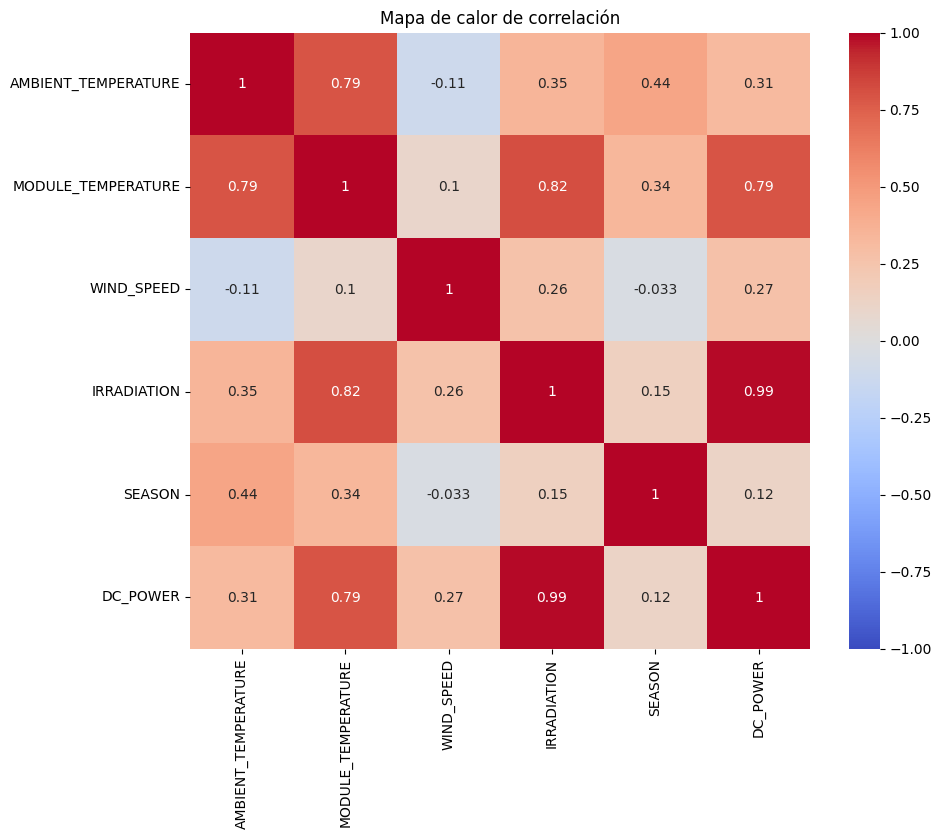

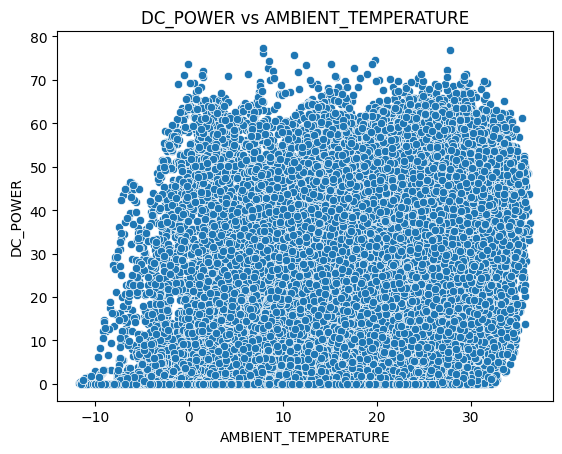

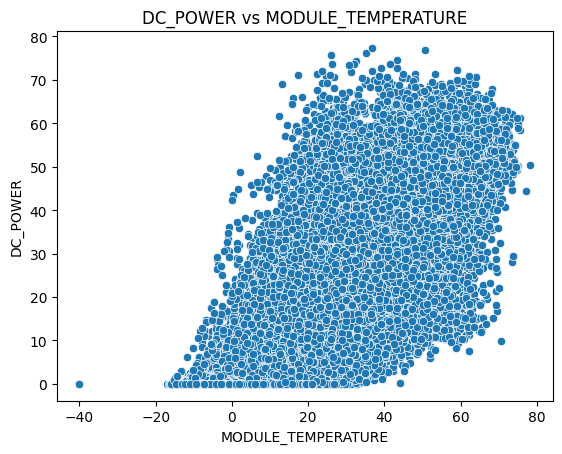

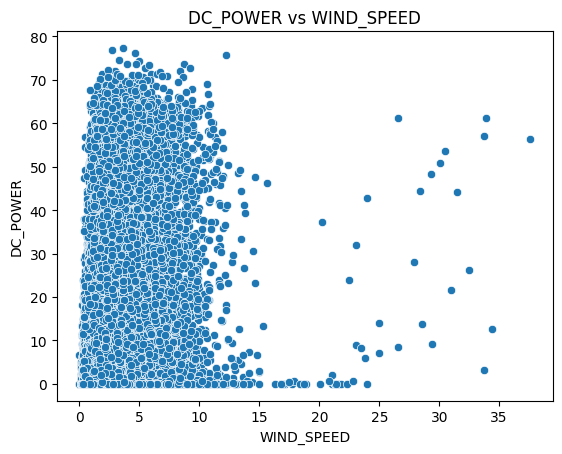

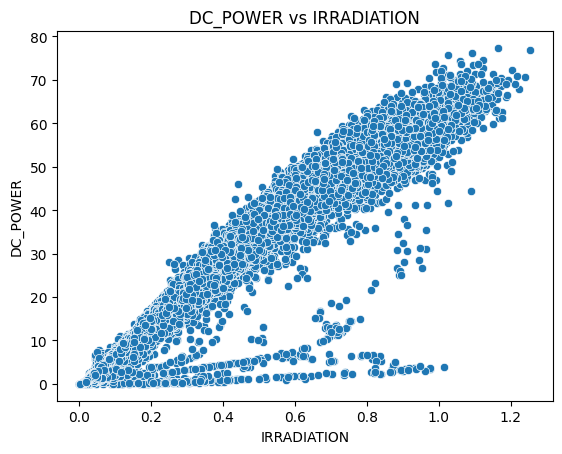

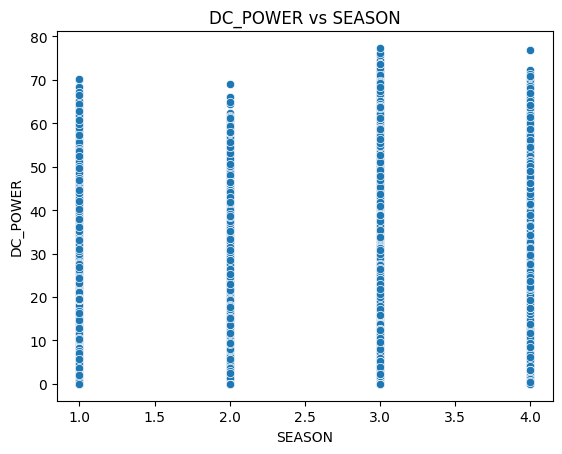

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combinar X_test y y_test en un solo DataFrame
df_corr = X_test.copy()
df_corr['DC_POWER'] = y_test['DC_POWER']  # Agregar la variable objetivo

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de calor de correlación")
plt.show()

# Graficos de dispersión entre cada variable independiente y AC_POWER
for col in X_test.columns:
    plt.figure()
    sns.scatterplot(x=df_corr[col], y=df_corr['DC_POWER'])
    plt.title(f"DC_POWER vs {col}")
    plt.xlabel(col)
    plt.ylabel("DC_POWER")
    plt.show()


# OPTIMIZACION DE DATOS E HIPERPARAMETROS


Se puede obervar que existen casos donde la irradiancia es mayor a 0, y el valor de DC_POWER es 0

**Optuna**

In [72]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [73]:
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

def objective(trial):
    # Definir los hiperparámetros que Optuna optimizará
    max_depth = trial.suggest_int("max_depth", 5, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # Crear el modelo con los hiperparámetros propuestos
    rfr = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion='squared_error',
        splitter='best',
        max_features=None,
        min_impurity_decrease=0.0,
        ccp_alpha=0.0
    )

    # Entrenar el modelo
    rfr.fit(X_train, y_train)

    # Predicciones y cálculo del RMSE
    y_pred = rfr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Usar RMSE

    return rmse


# Ejecutar Optuna para la optimización
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros y MAE
best_params = study.best_params
best_rmse = study.best_value

print("Mejores hiperparámetros (Optuna):", best_params)
print("Mejor RMSE (Optuna):", best_rmse)

# Re-train the model with the best parameters and predict on the test set
best_model = DecisionTreeRegressor(**best_params)  # Create model with best params
best_model.fit(X_train, y_train)                  # Train the model
y_pred = best_model.predict(X_test)               # Predict on test set


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE (Optuna):", mae)
print("R2 Score (Optuna):", r2)

[I 2024-11-06 04:23:31,031] A new study created in memory with name: no-name-0a4e53a4-16d3-4442-bd3e-89264e828021
[I 2024-11-06 04:23:37,656] Trial 0 finished with value: 3.1744094561933003 and parameters: {'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 3.1744094561933003.
[I 2024-11-06 04:23:43,869] Trial 1 finished with value: 3.275761459025053 and parameters: {'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 3.1744094561933003.
[I 2024-11-06 04:23:48,185] Trial 2 finished with value: 3.5020590341290285 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 3.1744094561933003.
[I 2024-11-06 04:23:55,734] Trial 3 finished with value: 3.171129770682056 and parameters: {'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 3 with value: 3.171129770682056.
[I 2024-11-06 04:24:00,545] Trial 4 finished with value: 3.033883

Mejores hiperparámetros (Optuna): {'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 5}
Mejor RMSE (Optuna): 2.946624075873211
MAE (Optuna): 1.051733886401919
R2 Score (Optuna): 0.9942581765142218


In [74]:
rmse_percentage = (best_rmse / y_test.mean()) * 100
print(f"RMSE como porcentaje de la media: {rmse_percentage['DC_POWER']:.2f}%")


RMSE como porcentaje de la media: 24.23%


**GRID SEARCH**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir el modelo y los rangos de hiperparámetros para GridSearch
param_grid = {
    'max_depth': range(5, 31, 5),
    'min_samples_split': range(2, 11, 2),
    'min_samples_leaf': range(1, 6)
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Minimizar el RMSE
    cv=5,                                   # Validación cruzada con 5 particiones
    n_jobs=-1, # Utilizar todos los núcleos disponibles
    verbose=2,  # Mostrar mensajes de progreso
    refit=True,  # Re-entrenar el modelo con los mejores hiperparámetros
    return_train_score=True,  # Devolver el puntaje de entrenamiento
    error_score='raise',  # Manejar errores
    pre_dispatch='2*n_jobs',  # Paralelizar el ajuste de hiperparámetros

)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y RMSE
best_params_grid = grid_search.best_params_
best_rmse_grid = -grid_search.best_score_

print("Mejores hiperparámetros (GridSearchCV):", best_params_grid)
print("Mejor RMSE (GridSearchCV):", best_rmse_grid)

# Reentrenar el modelo con los mejores parámetros de GridSearch y hacer predicciones
best_model_grid = DecisionTreeRegressor(**best_params_grid)
best_model_grid.fit(X_train, y_train)
y_pred_grid = best_model_grid.predict(X_test)

# Calcular MAE y R2 Score
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print("MAE (GridSearchCV):", mae_grid)
print("R2 Score (GridSearchCV):", r2_grid)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Mejores hiperparámetros (GridSearchCV): {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor RMSE (GridSearchCV): 2.7895329990022537
MAE (GridSearchCV): 1.0202332436231178
R2 Score (GridSearchCV): 0.9939433320385587


In [76]:
import os

# Crear la carpeta 'output'
os.makedirs('output', exist_ok=True)

# Crear un DataFrame con los resultados
results = pd.DataFrame([best_params])
results['RMSE'] = best_rmse

# Guardar en CSV
results.to_csv("output/hyperparameter_optimization_results.csv", index=False)



In [77]:
prediction_normal=rfr.predict(X_test)
prediction_optuna = best_model.predict(X_test)
prediction_grid = best_model_grid.predict(X_test)

In [79]:
cross_checking = pd.DataFrame({'Actual' : y_test['DC_POWER'] , 'Predicted_normal' : prediction_normal[:, 0], 'Predicted_optuna' : prediction_optuna[:, 0], 'Predicted_grid' : prediction_grid[:, 0]})
cross_checking.head()

,Actual,Predicted_normal,Predicted_optuna,Predicted_grid
333998,10.990,12.01850,12.066738,12.022976
23070,1.092,1.12134,1.049429,0.950714
28538,0.000,0.00000,0.000000,0.000000
266661,0.000,0.00000,0.000000,0.000000
1283,0.000,0.00000,0.000000,0.000000


In [80]:
import numpy as np

# Calcular los errores en porcentaje con manejo de divisiones donde Actual - Predicted es 0
cross_checking['Error_normal'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_normal'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_normal']) * 100 / cross_checking['Actual']
)

cross_checking['Error_optuna'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_optuna'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_optuna']) * 100 / cross_checking['Actual']
)

cross_checking['Error_grid'] = np.where(
    cross_checking['Actual'] - cross_checking['Predicted_grid'] == 0,
    0,
    abs(cross_checking['Actual'] - cross_checking['Predicted_grid']) * 100 / cross_checking['Actual']
)

# Aplicar formato de estilo con un gradiente de color personalizado para resaltar errores altos en rojo
cross_checking.sample(25).style.background_gradient(
    cmap='coolwarm', subset=['Error_normal', 'Error_optuna', 'Error_grid']
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'DarkBlack',
    'font-size': '15px'
})


,Actual,Predicted_normal,Predicted_optuna,Predicted_grid,Error_normal,Error_optuna,Error_grid
84041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
52524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
134782,21.640000,20.818600,20.438194,20.688871,3.795749,5.553633,4.395236
300568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
94130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396704,43.080000,43.100600,42.326931,42.884619,0.047818,1.748072,0.453531
153253,0.175000,0.156300,0.153494,0.147111,10.685714,12.289199,15.936508
54002,50.000000,47.666600,45.774349,46.295642,4.666800,8.451302,7.408716
201840,49.580000,49.358200,49.245845,49.778039,0.447358,0.673972,0.399434
144019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **GUARDAR MODELO**

In [82]:
import joblib


# Guardar el modelo
#joblib.dump(rfr, 'rfr.pkl')
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_model_grid, 'best_model_grid.pkl')
# Guardar los datos
pd.to_pickle(X_train, 'X_train.pkl')
pd.to_pickle(X_test, 'X_test.pkl')
pd.to_pickle(y_train, 'y_train.pkl')
pd.to_pickle(y_test, 'y_test.pkl')

